In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r'../data/synthesized_raw_student_data.csv')
dataset.head()

,study_hours_per_day,prep_days_before_exam,attendance_percentage,internal_marks,internal_marks_weight,subject_difficulty,study_material_source,past_performance,self_study_or_coaching,motivation_level,doubt_resolution_time,exam_anxiety_level,final_exam_marks
0,3.03,9.0,77.83,71.78,0.38,3.0,Textbooks,70.11,Coaching,4.0,11.35,3.0,42.5
1,2.66,27.0,97.65,73.44,0.42,4.0,YouTube,37.54,Coaching,3.0,2.32,3.0,48.2
2,3.92,24.0,89.60,68.89,0.54,3.0,Coaching,37.94,Self-study,3.0,9.29,4.0,59.1
3,3.73,1.0,82.37,54.45,0.60,4.0,YouTube,65.74,Self-study,5.0,3.26,3.0,46.3
4,1.98,16.0,93.56,50.52,0.43,3.0,Notes,68.07,Self-study,4.0,6.37,3.0,55.7


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   study_hours_per_day     6810 non-null   float64
 1   prep_days_before_exam   6811 non-null   float64
 2   attendance_percentage   6811 non-null   float64
 3   internal_marks          6809 non-null   float64
 4   internal_marks_weight   6810 non-null   float64
 5   subject_difficulty      6811 non-null   float64
 6   study_material_source   6811 non-null   object 
 7   past_performance        6809 non-null   float64
 8   self_study_or_coaching  6810 non-null   object 
 9   motivation_level        6810 non-null   float64
 10  doubt_resolution_time   6810 non-null   float64
 11  exam_anxiety_level      6811 non-null   float64
 12  final_exam_marks        7021 non-null   float64
dtypes: float64(11), object(2)
memory usage: 713.2+ KB


In [4]:
dataset.shape

(7021, 13)

In [5]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7016    False
7017    False
7018    False
7019    False
7020    False
Length: 7021, dtype: bool

In [6]:
dataset = dataset.drop_duplicates(keep='first')

In [7]:
dataset.shape

(7000, 13)

In [8]:
dataset.isnull().sum()

study_hours_per_day       210
prep_days_before_exam     210
attendance_percentage     210
internal_marks            210
internal_marks_weight     210
subject_difficulty        210
study_material_source     210
past_performance          210
self_study_or_coaching    210
motivation_level          210
doubt_resolution_time     210
exam_anxiety_level        210
final_exam_marks            0
dtype: int64

In [9]:
dataset.isnull().sum()/dataset.shape[0]*100

study_hours_per_day       3.0
prep_days_before_exam     3.0
attendance_percentage     3.0
internal_marks            3.0
internal_marks_weight     3.0
subject_difficulty        3.0
study_material_source     3.0
past_performance          3.0
self_study_or_coaching    3.0
motivation_level          3.0
doubt_resolution_time     3.0
exam_anxiety_level        3.0
final_exam_marks          0.0
dtype: float64

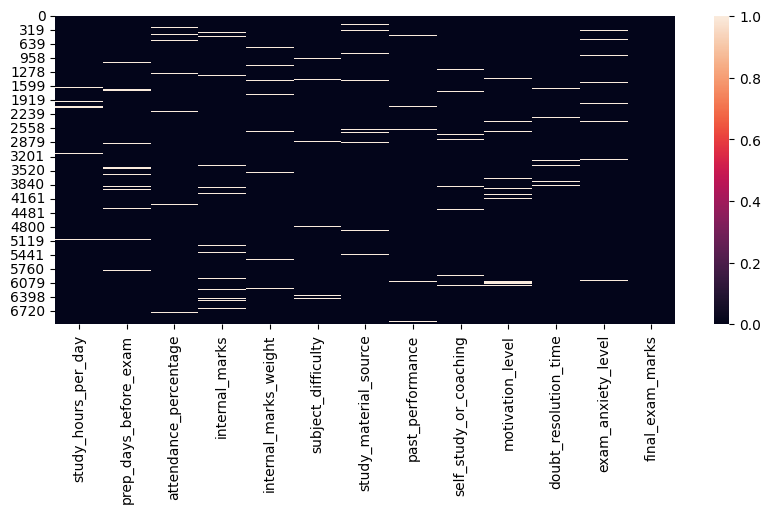

In [10]:
plt.figure(figsize=(10,4))
sns.heatmap(dataset.isnull())
plt.show()

In [11]:
for i in dataset.select_dtypes(include='float64').columns:
    dataset[i] = dataset[i].fillna(dataset[i].mean())

In [12]:
for i in dataset.select_dtypes(include='object').columns:
    dataset[i] = dataset[i].fillna(dataset[i].mode()[0])

In [13]:
dataset.isnull().sum()

study_hours_per_day       0
prep_days_before_exam     0
attendance_percentage     0
internal_marks            0
internal_marks_weight     0
subject_difficulty        0
study_material_source     0
past_performance          0
self_study_or_coaching    0
motivation_level          0
doubt_resolution_time     0
exam_anxiety_level        0
final_exam_marks          0
dtype: int64

In [14]:
dataset.describe()

,study_hours_per_day,prep_days_before_exam,attendance_percentage,internal_marks,internal_marks_weight,subject_difficulty,past_performance,motivation_level,doubt_resolution_time,exam_anxiety_level,final_exam_marks
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3.518264,19.705302,84.792887,69.807135,0.496299,3.015317,67.952074,3.245950,5.063059,2.999558,56.788257
std,1.535600,9.601142,9.335410,14.293907,0.219096,1.068079,11.603463,0.968076,2.829276,1.080090,11.888664
min,0.000000,0.000000,46.440000,15.170000,0.100000,1.000000,30.000000,1.000000,0.000000,1.000000,16.300000
25%,2.520000,13.000000,78.477500,60.020000,0.330000,2.000000,60.090000,3.000000,3.100000,2.000000,48.300000
50%,3.518264,19.705302,84.792887,69.807135,0.496299,3.000000,67.952074,3.000000,5.063059,3.000000,56.200000
75%,4.460000,26.000000,91.722500,79.555000,0.660000,4.000000,75.650000,4.000000,6.880000,4.000000,64.700000
max,20.870000,54.000000,100.000000,100.000000,0.990000,5.000000,100.000000,5.000000,16.490000,5.000000,100.000000


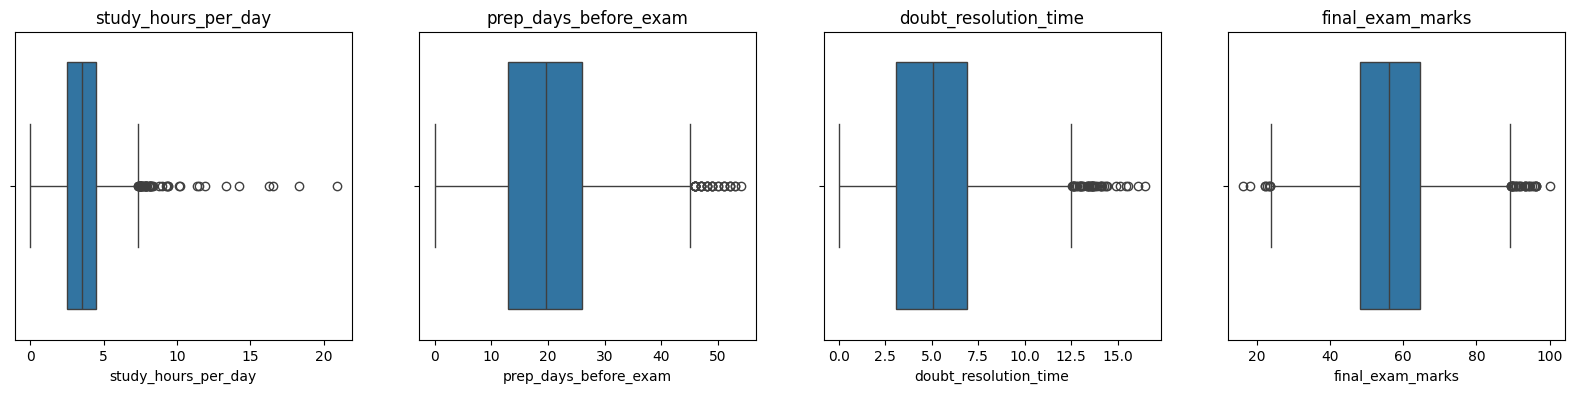

In [15]:
plt.figure(figsize=(20, 4))
for i, col in enumerate(['study_hours_per_day', 'prep_days_before_exam', 'doubt_resolution_time', 'final_exam_marks'], 1):
    plt.subplot(1, 4, i)
    sns.boxplot(x=dataset[col])
    plt.title(col)
plt.show()


In [16]:
def iqr_outliers_removal(dataset, column):
    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)
    iqr = q3 - q1
    min_range = q1 - (1.5 * iqr)
    max_range = q3 + (1.5 * iqr)
    return dataset[(dataset[column] >= min_range) & (dataset[column] <= max_range)]


In [17]:
outliers_columns = ['study_hours_per_day', 'prep_days_before_exam', 'doubt_resolution_time', 'final_exam_marks']
for col in outliers_columns:
    dataset = iqr_outliers_removal(dataset, col)

In [18]:
dataset.shape

(6842, 13)

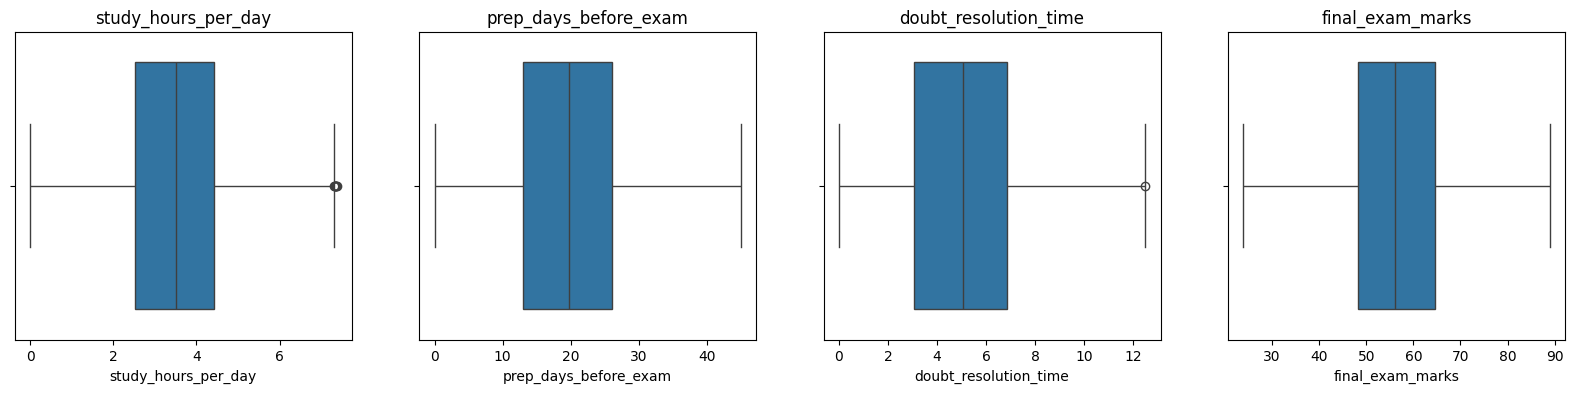

In [19]:
plt.figure(figsize=(20, 4))
for i, col in enumerate(['study_hours_per_day', 'prep_days_before_exam', 'doubt_resolution_time', 'final_exam_marks'], 1):
    plt.subplot(1, 4, i)
    sns.boxplot(x=dataset[col])
    plt.title(col)
plt.show()


In [20]:
dataset['study_material_source'].value_counts()

study_material_source
Textbooks    2211
YouTube      1964
Coaching     1335
Notes        1332
Name: count, dtype: int64

In [21]:
dataset['self_study_or_coaching'].value_counts()

self_study_or_coaching
Self-study     3503
Coaching       2060
Group study    1279
Name: count, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()
dataset['study_material_source'] = le.fit_transform(dataset['study_material_source'])
dataset['self_study_or_coaching'] = le.fit_transform(dataset['self_study_or_coaching'])

In [24]:
dataset.head()

,study_hours_per_day,prep_days_before_exam,attendance_percentage,internal_marks,internal_marks_weight,subject_difficulty,study_material_source,past_performance,self_study_or_coaching,motivation_level,doubt_resolution_time,exam_anxiety_level,final_exam_marks
0,3.03,9.0,77.83,71.78,0.38,3.0,2,70.11,0,4.0,11.35,3.0,42.5
1,2.66,27.0,97.65,73.44,0.42,4.0,3,37.54,0,3.0,2.32,3.0,48.2
2,3.92,24.0,89.60,68.89,0.54,3.0,0,37.94,2,3.0,9.29,4.0,59.1
3,3.73,1.0,82.37,54.45,0.60,4.0,3,65.74,2,5.0,3.26,3.0,46.3
4,1.98,16.0,93.56,50.52,0.43,3.0,1,68.07,2,4.0,6.37,3.0,55.7


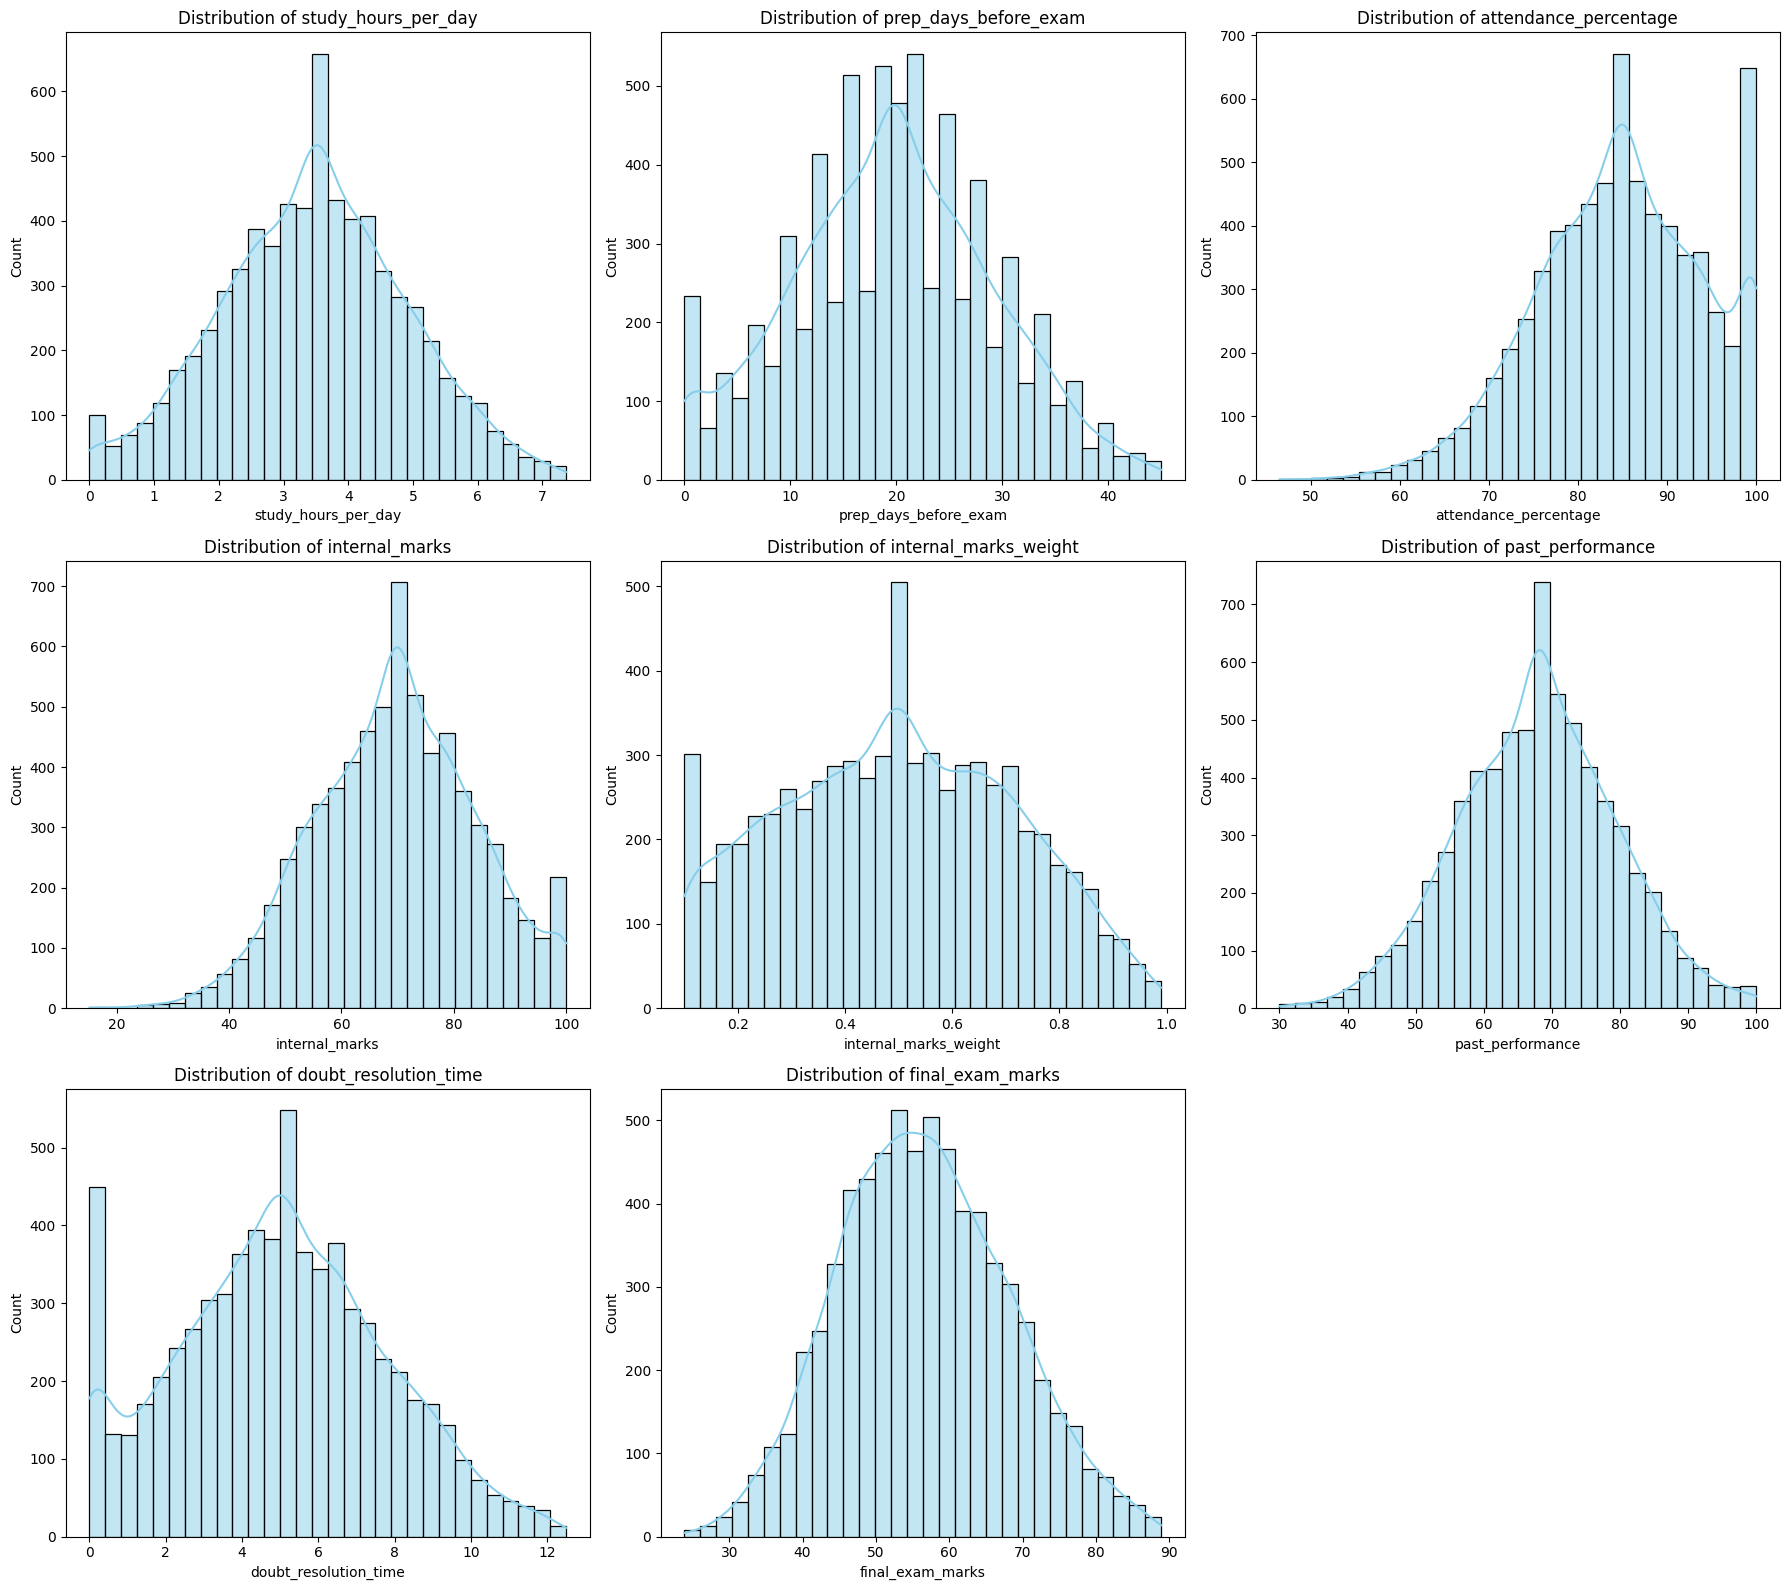

In [25]:
num_cols = [
    'study_hours_per_day', 'prep_days_before_exam', 'attendance_percentage',
    'internal_marks', 'internal_marks_weight', 'past_performance',
    'doubt_resolution_time', 'final_exam_marks'
]

plt.figure(figsize=(18, 16))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(dataset[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [26]:
num_data = dataset[num_cols]
skew_values = num_data.skew()
skew_values

study_hours_per_day     -0.015276
prep_days_before_exam    0.043391
attendance_percentage   -0.316855
internal_marks          -0.084686
internal_marks_weight    0.040197
past_performance        -0.011749
doubt_resolution_time    0.109478
final_exam_marks         0.157368
dtype: float64

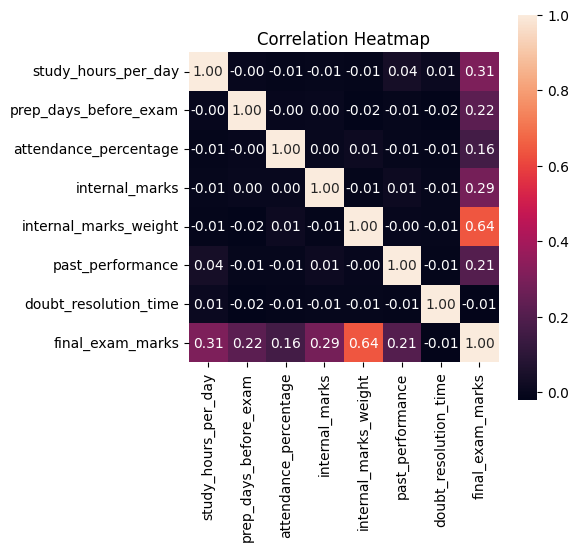

In [27]:
plt.figure(figsize=(5,5))
corr = dataset[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
ms = MinMaxScaler()

scaling_columns = [
    'study_hours_per_day', 'prep_days_before_exam', 'attendance_percentage', 'internal_marks', 'internal_marks_weight',
    'past_performance', 'doubt_resolution_time'
]

dataset[scaling_columns] = ms.fit_transform(dataset[scaling_columns])

In [30]:
dataset.head()

,study_hours_per_day,prep_days_before_exam,attendance_percentage,internal_marks,internal_marks_weight,subject_difficulty,study_material_source,past_performance,self_study_or_coaching,motivation_level,doubt_resolution_time,exam_anxiety_level,final_exam_marks
0,0.411126,0.200000,0.586072,0.667335,0.314607,3.0,2,0.573000,0,4.0,0.908727,3.0,42.5
1,0.360923,0.600000,0.956124,0.686903,0.359551,4.0,3,0.107714,0,3.0,0.185749,3.0,48.2
2,0.531886,0.533333,0.805825,0.633267,0.494382,3.0,0,0.113429,2,3.0,0.743795,4.0,59.1
3,0.506106,0.022222,0.670836,0.463044,0.561798,4.0,3,0.510571,2,5.0,0.261009,3.0,46.3
4,0.268657,0.355556,0.879761,0.416716,0.370787,3.0,1,0.543857,2,4.0,0.510008,3.0,55.7


In [31]:
dataset.to_csv(r'../data/processed_student_data.csv', index=False)